# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

## Question 1: Is the distribution of body temperatures normal? 

In [3]:
# import library 
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np
%matplotlib inline
import scipy.stats as stats
import pylab 

C:\Users\PANDEYSU\AppData\Local\Continuum\miniconda2\envs\tutorial\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
# read CSV file 
df = pd.read_csv('C:\DataScince\Dsc_human_temp\EDA_human_temperature\data\human_body_temperature.csv')

In [6]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


#  Q 1.  Is the distribution of body temperatures normal? 

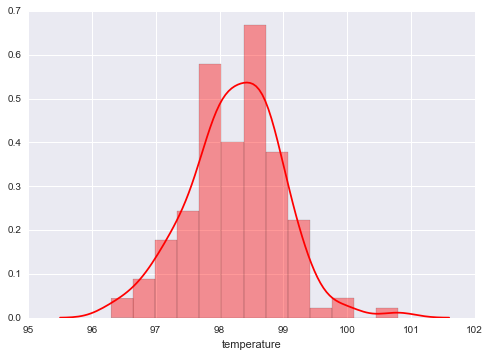

In [9]:
# create distribution plot using distplot
sns.set()
sns.distplot(df['temperature'],color='r')
plt.show()

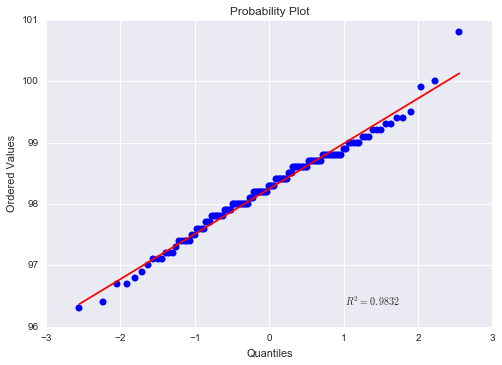

In [10]:
stats.probplot(df['temperature'], dist="norm", plot=pylab)
pylab.show()

###  ANS 1 : Temprature data is aproximately normaly distributed as per above graph observations  

## Q 2 : Is the sample size large? Are the observations independent? 

In [8]:
df.shape


(130, 3)

### ANS 2:  Number of observations are 130. which is greter > 30. We can say sampple size is large and independent    

## Q 3. Is the true population mean really 98.6 degrees F? 

In [11]:
# performe Z and T test. We will use one-sample because only one variable  
from statsmodels.stats.weightstats import ztest
print ztest(df.temperature,value=98.6)
print stats.ttest_1samp(df.temperature,98.6)

(-5.4548232923645195, 4.9021570141012155e-08)
Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


In [17]:
#Level of sigificance ( degrees of freddom = n-1)
stats.t.ppf(q=0.975,  # Quantile to check
            df=129)  # Degrees of freedom

1.9785244914586051

<p>Let's first formulate the null hypothesis $H_0$ and the alternate hypotheses $H_A$.<p>

$H_0$ : Body Temperature is $98.6 ^{\circ} F$

$H_A$ : Body Temperature is not $98.6 ^{\circ} F$

Level of Significance - Reject null hypothesis if Z-Score < -1.97 or Z-Score > 1.97

Conclusion - Since Z-Score < -1.97 is true, we can reject the null hypothesis. We can conclude that there is sufficient evidence to support alternative hypothesis that average body temperature is different from 98.6

## Q 4:Draw a small sample of size 10 from the data and repeat both frequentist tests. 

In [18]:
newdf = df.temperature[2:12]
newdf

2     97.8
3     99.2
4     98.0
5     99.2
6     98.0
7     98.8
8     98.4
9     98.6
10    98.8
11    96.7
Name: temperature, dtype: float64

In [19]:
from statsmodels.stats.weightstats import ztest
print ztest(newdf,value=98.6)
print stats.ttest_1samp(newdf,98.6)

(-1.0415662118068292, 0.2976128406366424)
Ttest_1sampResult(statistic=-1.0415662118068292, pvalue=0.32478287891942614)


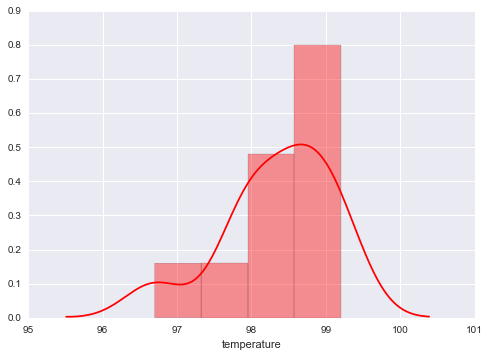

In [22]:
sns.distplot(newdf,color='r')
plt.show()

### due to the central limit theorem in most cases with a very large sample of means you can assume normality and use the Z score.

## Q 5. At what temperature should we consider someone's temperature to be "abnormal"? 

In [13]:
from scipy.stats import sem, t
from scipy import mean
confidence = 0.95
n=len(df)
mean=np.mean(df.temperature)
print('len=%.3f, mean=%.3f' % (n, mean))
# standard erorr
std_err=sem(df.temperature)
print ('standard erorr:%.3f'%(std_err))


len=130.000, mean=98.249
standard erorr:0.064


In [14]:
# Calculate margin 
h = std_err * t.ppf((1 + confidence) / 2, n - 1)
print h

0.127227863623


In [15]:
# Get confidence interval 
confidence_interval = [mean-h,mean+h]
confidence_interval

[98.122002905608014, 98.376458632853485]

### We calculate a confidence interval on the true population average temperature. If someone's temperature is out of this interval, we could say that the temprerature is abnormal.



## Q 6: Is there a significant difference between males and females in normal temperature? 

In [25]:
f_temp = np.array(df.temperature[df.gender=='F'])
m_temp = np.array(df.temperature[df.gender=='M'])
stats.ttest_ind(f_temp,m_temp)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

$H_0$ : average values are equal among the two samples

$H_A$ : average values are not equal among the two samples

### We see that the pvalue is 0.023 which is quite small. Hence, we reject the hypothesis that the average values are equal among the two samples.

### Significance : This means that the there is a significant difference between males and females in normal temperature.